In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/bank-full.csv')
df.sample(8)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
20968,57,technician,divorced,secondary,no,3043,no,no,cellular,14,aug,707,2,-1,0,unknown,yes
42287,24,student,single,secondary,no,382,no,no,cellular,13,nov,256,2,92,3,failure,yes
31919,68,retired,divorced,primary,no,695,no,no,cellular,9,apr,233,1,-1,0,unknown,yes
15581,29,technician,married,tertiary,no,-14,no,no,cellular,21,jul,203,2,-1,0,unknown,no
45016,40,management,married,tertiary,no,0,no,no,cellular,14,oct,1410,3,-1,0,unknown,no
36184,44,blue-collar,single,secondary,no,-210,yes,no,cellular,11,may,73,4,-1,0,unknown,no
33609,45,services,married,primary,no,-79,yes,no,cellular,20,apr,59,4,348,2,failure,no
21438,38,technician,divorced,secondary,no,276,no,no,cellular,18,aug,92,14,-1,0,unknown,no


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
def calculate_outlier_percentage(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100

    return outlier_percentage

for i in num_cols:
    outlier_percentage = calculate_outlier_percentage(i)
    print(f"Column: {i},    Outlier Percentage: {outlier_percentage:.2f}%")

Column: age,    Outlier Percentage: 1.08%
Column: balance,    Outlier Percentage: 10.46%
Column: day,    Outlier Percentage: 0.00%
Column: duration,    Outlier Percentage: 7.16%
Column: campaign,    Outlier Percentage: 6.78%
Column: pdays,    Outlier Percentage: 18.26%
Column: previous,    Outlier Percentage: 18.26%


In [ ]:
df.Target.value_counts()

,count
Target,
no,39922
yes,5289


In [ ]:
df.job.value_counts()

,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


In [ ]:
df.marital.value_counts()

,count
marital,
married,27214
single,12790
divorced,5207


In [ ]:
df.education.value_counts()

,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


In [ ]:
df.default.value_counts()

,count
default,
no,44396
yes,815


In [ ]:
df.housing.value_counts()

,count
housing,
yes,25130
no,20081


In [ ]:
df.loan.value_counts()

,count
loan,
no,37967
yes,7244


In [ ]:
df.contact.value_counts()

,count
contact,
cellular,29285
unknown,13020
telephone,2906


In [ ]:
df.poutcome.value_counts()

,count
poutcome,
unknown,36959
failure,4901
other,1840
success,1511


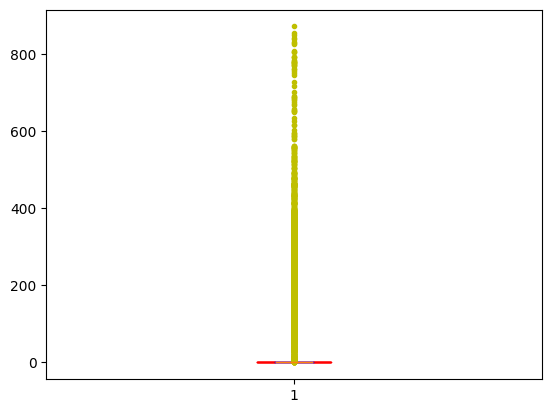

In [ ]:
plt.boxplot(df['pdays'], notch = True, sym = "y.", boxprops = {"color" : 'r'}, capprops = {"color" : "b"}, whiskerprops = {"color" : "g"})
plt.show()


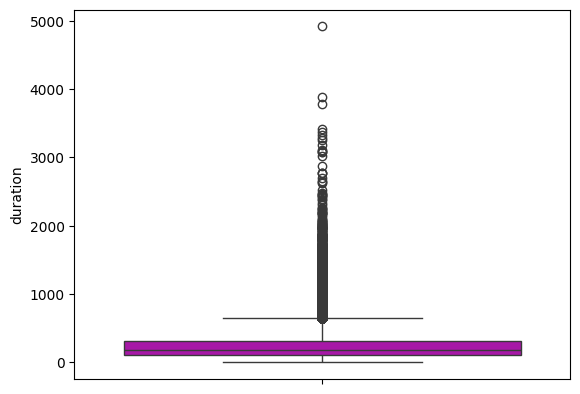

In [ ]:
sns.boxplot(df['duration'], color = 'm')
plt.show()

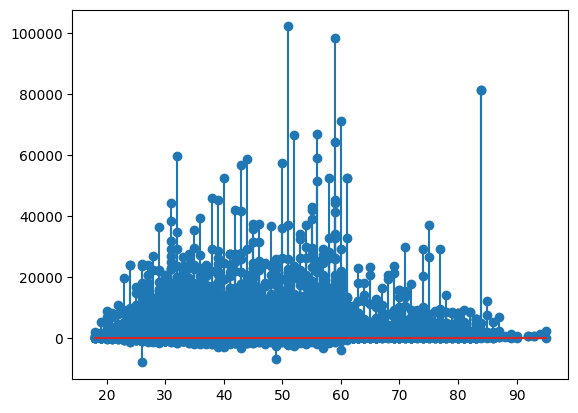

In [ ]:
x = df['age']
y = df['balance']
plt.stem(x, y)
plt.show()

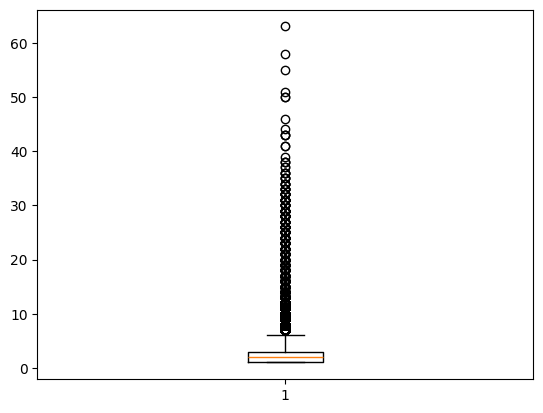

In [ ]:
plt.boxplot(df.campaign)
plt.show()

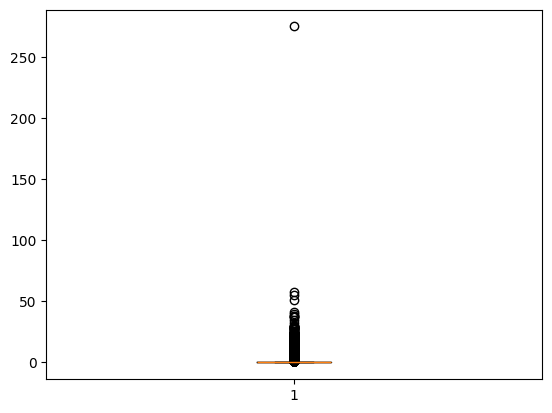

In [ ]:
plt.boxplot(df.previous)
plt.show()

In [ ]:
df[df.duration >= 3750]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
9947,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,yes
24148,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,no
44602,45,services,single,secondary,no,955,no,no,unknown,27,aug,3785,1,-1,0,unknown,no


In [ ]:
df.drop([24148, 9947, 44602], axis = 0, inplace = True)

In [ ]:
df[df.campaign >= 50]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
4299,30,management,single,tertiary,no,358,yes,no,unknown,19,may,88,51,-1,0,unknown,no
4330,45,management,married,unknown,no,9051,yes,no,unknown,19,may,124,63,-1,0,unknown,no
5073,35,technician,married,secondary,no,432,yes,no,unknown,21,may,1094,55,-1,0,unknown,no
5459,35,blue-collar,married,secondary,no,430,yes,no,unknown,23,may,147,50,-1,0,unknown,no
11914,24,technician,single,primary,no,126,yes,no,unknown,20,jun,10,58,-1,0,unknown,no
18713,35,blue-collar,married,secondary,no,280,yes,yes,cellular,31,jul,65,50,-1,0,unknown,no


In [ ]:
df.drop([4299, 4330, 5073, 5459, 11914, 18713], axis = 0, inplace = True)

In [ ]:
df.drop(['pdays', 'previous', 'day', 'month', 'poutcome'], axis = 1, inplace = True)
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,no


In [ ]:
num_cols = ['age', 'balance', 'duration', 'campaign']
# updating num_cols as some columns were deleted

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y

,Target
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state = 50)

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
trans = ColumnTransformer(transformers=[
    ('ordinal', OrdinalEncoder(categories=[['unknown', 'primary', 'secondary', 'tertiary']]), [3]),
    ('onehot', OneHotEncoder(sparse_output=False, drop='first'), [1, 2, 4, 6, 7, 8]),
    ('scaling', StandardScaler(), num_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('transformation', trans)
])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

X_train_transformed = pipeline.fit_transform(X_train)

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=pipeline.get_feature_names_out())

X_test_transformed = pipeline.transform(X_test)

X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=pipeline.get_feature_names_out())

df_train_transformed = pd.concat([X_train_transformed_df, pd.Series(y_train, name='target')], axis=1)
df_test_transformed = pd.concat([X_test_transformed_df, pd.Series(y_test, name='target')], axis=1)

In [ ]:
X_train = df_train_transformed
X_test = df_test_transformed

In [ ]:
log_model = LogisticRegression(max_iter = 750)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=750)

In [ ]:
y_pred_lr = log_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print(accuracy_score(y_test, y_pred_lr))

1.0


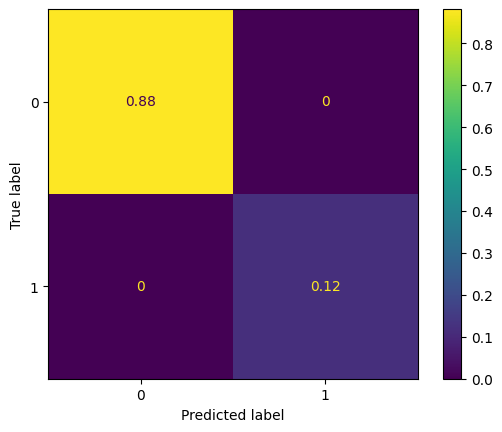

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr, normalize = 'all')
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_split=200, min_samples_leaf=75)
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=75, min_samples_split=200)

In [ ]:
y_pred_dt = dt.predict(X_test)
print(accuracy_score(y_test, y_pred_dt))

1.0
